In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import fastai
from fastai.vision import *
from fastai.callbacks import *
from fastai.utils.mem import *

from torchvision.models import vgg16_bn

In [3]:
%cd drive/My Drive

/content/drive/My Drive


In [4]:
%cd data/

/content/drive/My Drive/data


In [5]:
!ls

t1.zip	t2.zip


In [0]:
!unzip 't1.zip'
!unzip 't2.zip'

In [0]:
!rm -rf 't1.zip'
!rm -rf 't2.zip'

In [8]:
!ls

t1  t2


In [9]:
%cd ..

/content/drive/My Drive


In [0]:
path = Path('data')

path_t2 = path/'t2'
path_t1 = path/'t1'

In [0]:
bs = 16
size = 128

arch = models.resnet34

In [0]:
src = ImageImageList.from_folder(path=path_t2).split_by_rand_pct(0.1, seed=42)

In [0]:
def get_data(bs,size):
    data = (src.label_from_func(lambda x: path_t1/x.name)
           .transform(size=size, tfm_y=True)
           .databunch(bs=bs).normalize(imagenet_stats, do_y=True))

    return data

In [30]:
verify_images(path_t2)

In [0]:
data = get_data(16, 128)

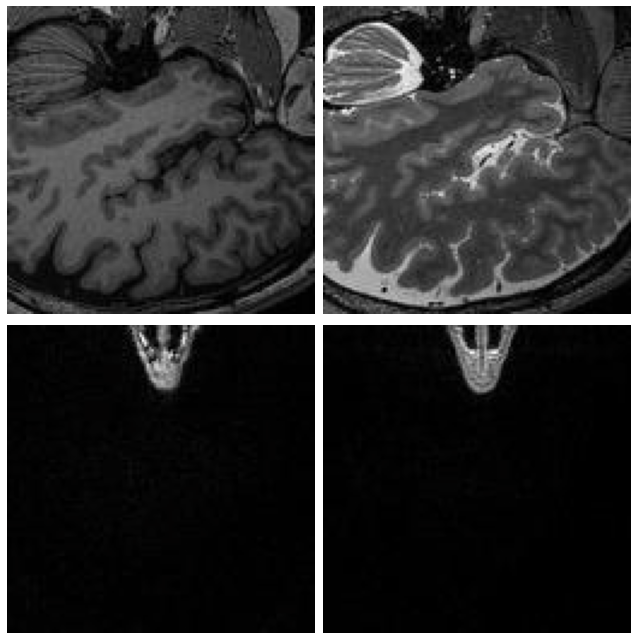

In [15]:
data.show_batch(ds_type=DatasetType.Valid, rows=2, figsize=(9,9))

In [0]:
base_loss = F.l1_loss

In [0]:
wd = 1e-3
learn = unet_learner(data, arch, wd=wd, loss_func=base_loss, blur=False, norm_type=NormType.Weight)
gc.collect();

epoch,train_loss,valid_loss,time
0,1.319214,#na#,00:07
1,1.273473,#na#,00:07


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


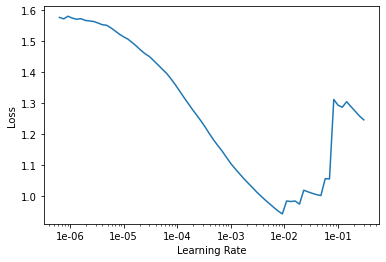

In [37]:
learn.lr_find()
learn.recorder.plot()

In [0]:
lr = 1e-3

In [0]:
def do_fit(save_name, lrs=slice(lr), pct_start=0.9):
    learn.fit_one_cycle(10, lrs, pct_start=pct_start)
    learn.save(save_name)
    learn.show_results(rows=3, imgsize=3)

epoch,train_loss,valid_loss,time
0,0.569271,0.459499,00:08
1,0.505142,0.438251,00:08
2,0.457192,0.372901,00:08
3,0.435261,0.390441,00:08
4,0.413086,0.399484,00:08
5,0.415614,0.368383,00:08
6,0.420893,0.384976,00:08
7,0.388379,0.384849,00:08
8,0.382498,0.350066,00:08
9,0.355964,0.325380,00:08


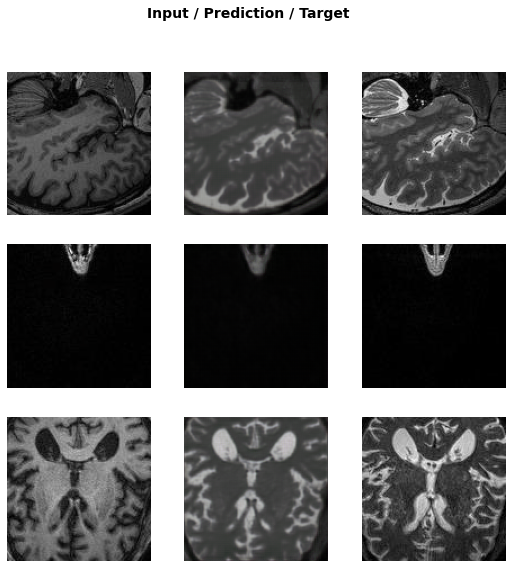

In [39]:
do_fit('chk1', slice(lr*10))

In [0]:
learn.unfreeze()

epoch,train_loss,valid_loss,time
0,0.323286,0.323292,00:08
1,0.323234,0.320407,00:09
2,0.320704,0.318458,00:09
3,0.318751,0.317133,00:09
4,0.314344,0.313277,00:09
5,0.310147,0.309828,00:09
6,0.306562,0.310820,00:09
7,0.303797,0.304217,00:09
8,0.297363,0.300778,00:08
9,0.289779,0.292532,00:08


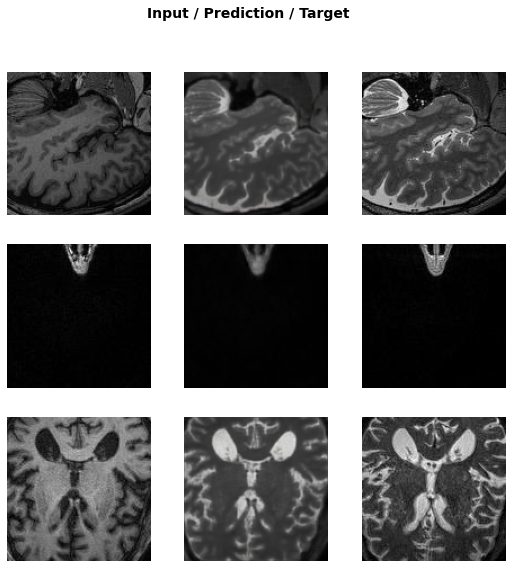

In [41]:
do_fit('chk2', slice(1e-5,lr))

In [0]:
learn.unfreeze()

epoch,train_loss,valid_loss,time
0,0.279135,0.291596,00:08
1,0.277114,0.290884,00:08
2,0.276094,0.289744,00:08
3,0.274506,0.289120,00:08
4,0.273186,0.289103,00:09
5,0.272582,0.288974,00:09
6,0.271461,0.288436,00:09
7,0.270085,0.288276,00:09
8,0.269661,0.287872,00:09
9,0.268331,0.288118,00:09


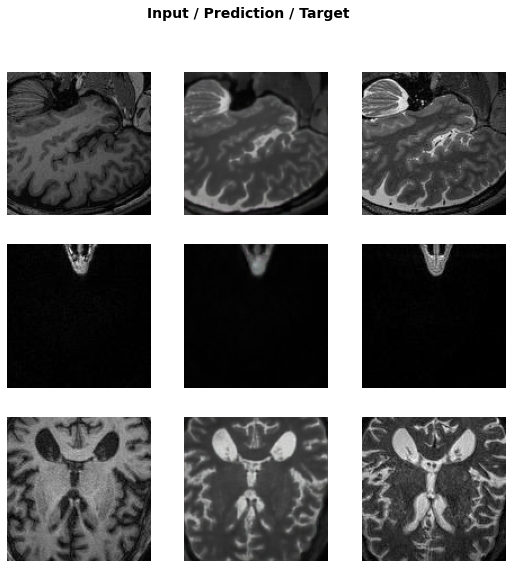

In [43]:
do_fit('chk3', slice(1e-6, 1e-4), pct_start=0.3)

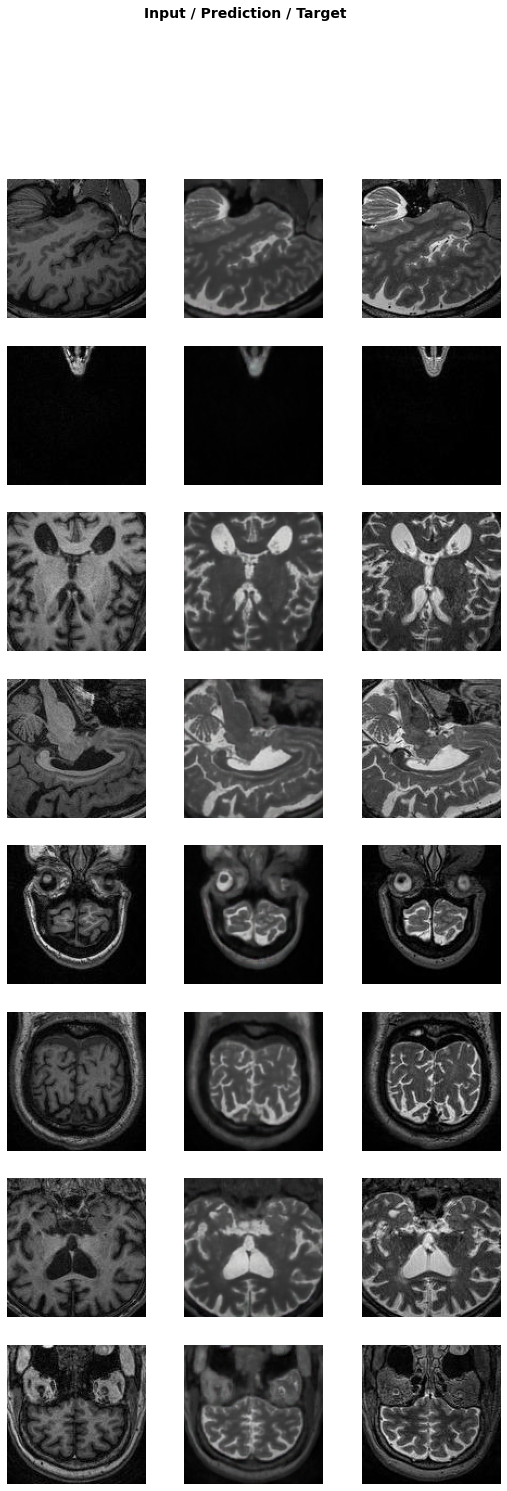

In [44]:
learn.show_results(rows=8, imgsize=3)